Aluno: Ykaro de Sousa Andrade.


Insper


# Analise Geo Referenciada da acessibilidade de pessoas em condicção de cadeirante na cidade de São Paulo.
---



- Este projeto tem como motivação a analise do nível de inclusão e mobilidade para pessoas com limitação de deslocamnete através de cadeira de rodas na cidade de São Paulo.

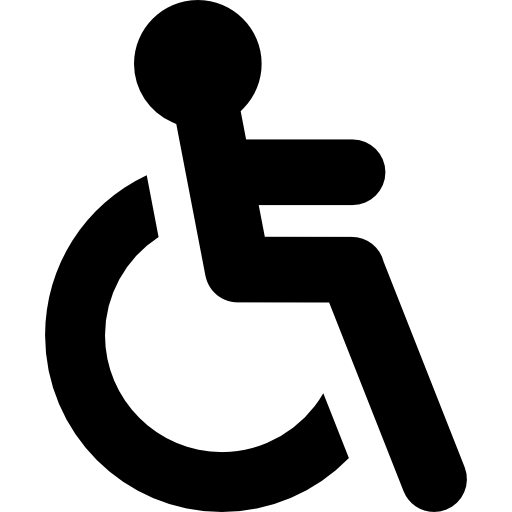

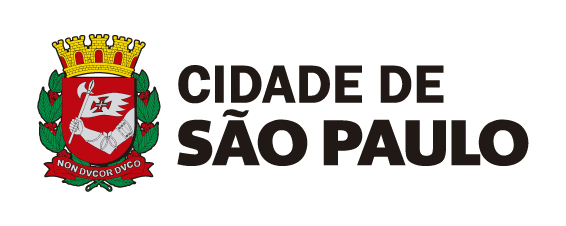

# Para iniciar a analise, é preciso realizar a instalação dos pacotes da biblioteca GeoPandas.

- O GeoPandas oferece estruturas de dados simples e intuitivas para trabalhar com informações geográficas, combinando funcionalidades de manipulação de dados do Pandas com capacidades de análise espacial.

In [1]:
## PASSO 1: INSTALAR BIBLIOTECAS
!pip install geopandas fiona contextily pygeos --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 74.9 MB/s eta 0:00:00


In [293]:
!pip install geopandas geopy pointpats fiona pygeos

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 44.5 MB/s eta 0:00:00


In [294]:
!pip install geopandas pygeos pysal --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 71.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.5/244.5 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.8/214.8 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [295]:
!pip install splot --quiet

In [2]:
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
import contextily

/usr/local/lib/python3.10/dist-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-2-28d5f342632a>:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling Py

# Para basear esta analise iremos buscar os dados no site GeoSampa que é mantido e atualizado pela prefitura de SP.

- Você pode acessar através do link abaixo ou no arquivo disponibilizado junto com este colab.

[siteGeoSampa](https://geosampa.prefeitura.sp.gov.br)

In [61]:
a = gpd.read_file('SIRGAS_SHP_selo_smped.shp')

## Os dados estão em um arquivo shapefile (ou arquivo .shp), que é um formato de arquivo amplamente utilizado para armazenar dados geoespaciais e informações de atributos associados a esses dados.

In [62]:
a.head()

,selo_ano,selo_nome,selo_numer,selo_ender,selo_final,selo_esfer,geometry
0,2015,SISTEMA INTEGRADO DE EDUCAÇÃO E CULTURA - SINEC,082,"R. APENINOS, 267 , ,","EMPRESAS, ENTD. CLASSE E SERVIÇOS",PRIVADO,POINT (332777.700 7392425.226)
1,2013,MINISTERIO PUBLICO DA UNIAO,046,"AV. BRIGADEIRO LUIS ANTONIO, 2020 , ,",CONDOMINIO E PREDIOS COMERCIAIS,PRIVADO,POINT (331796.617 7392915.286)
2,2012,CONDOMINIO EDIFICIO ONE HUNDRED,076,"R. OLIMPIADAS, 100 , ,",CONDOMINIO E PREDIOS COMERCIAIS,PRIVADO,POINT (328122.339 7389578.044)
3,2003,EMEI P. MANOEL DA NOBREGA,000,"R. ADELINO, 100 , ,",EMEI,PUBLICO,POINT (351062.586 7397110.324)
4,2019,BANCO DO BRASIL S.A,068,"R. SALVADOR GIANETTI, 848 , ,",BANCOS,PRIVADO,POINT (355655.837 7395639.895)


In [112]:
a.shape

(758, 7)

## Analisando aos dados

### Neste arquivo shapefile temos:
- selo_ano que representa o ano de implemnetação da zona de acessibilidade.
- selo_ender que representa o endereço de cada área.
- Geometry que representa o ponto em coordenadas de cada área.

## Abaixo podemos observar todas as coordenadas dos pontos.

<Axes: >

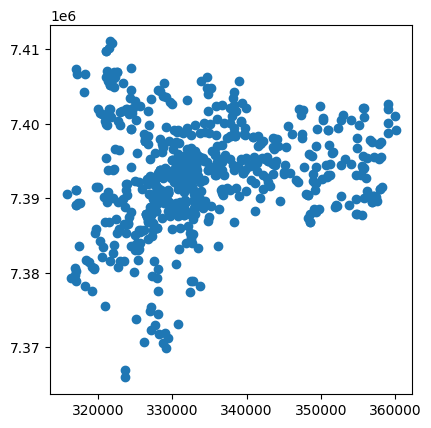

In [64]:
a.plot()

# Para uma melhor contextualização e visualização dos dados, iremos plotar o mapa da cidade de São Paulo com os pontos sobre postos.

In [113]:
# primeiro carregamos os dados com todas as cidades do estado de São Paulo
municipiosSP = gpd.read_file('SIRGAS_limites_municipais.shp')

In [114]:
municipiosSP.head()

,limite_id,municipio,Geometry_s,geometry
0,1,ITANHAÉM,1J6s,"POLYGON ((307339.109 7316497.555, 306260.118 7..."
1,10,EMBU-GUAÇU,1J6tf,"POLYGON ((306250.297 7350903.625, 306194.975 7..."
2,100,ITUVERAVA,None,"POLYGON ((194518.637 7762304.185, 194541.437 7..."
3,101,JABORANDI,None,"POLYGON ((142127.776 7701403.306, 142041.293 7..."
4,102,JABOTICABAL,None,"POLYGON ((150695.076 7658574.445, 150773.090 7..."


<Axes: >

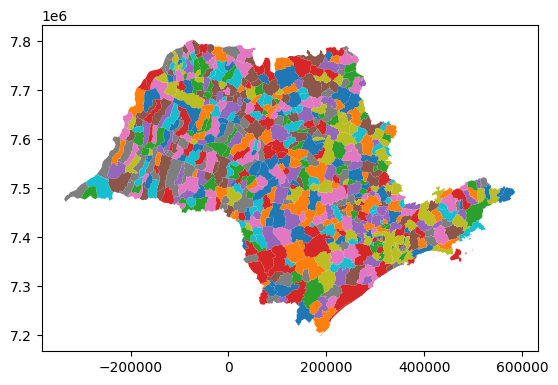

In [115]:
municipiosSP.plot(column='municipio')

# Agora deve-se filtrar as cidades:

In [116]:
SP = municipiosSP.query('     municipio == "SÃO PAULO"     ')

<Axes: >

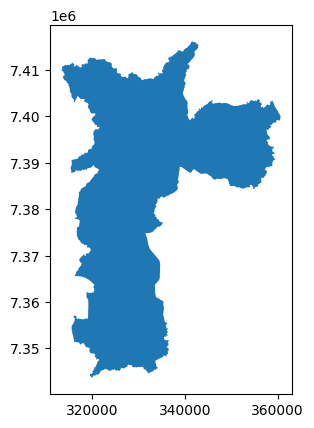

In [117]:
SP.plot()

## Precisamos garantir que o mapa está no Sistema de referência correto.

-O SIRGAS (Sistema de Referência Geocêntrico para as Américas) é um sistema de referência geodésico que fornece uma estrutura para a precisão na medição e representação de coordenadas geográficas e altitudes em toda a América Latina e o Caribe. Esse sistema foi desenvolvido para promover a interoperabilidade e a integração de dados geoespaciais em uma escala regional.

In [124]:
SP = SP.set_crs('SIRGAS2000')
SP.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# Gráfico

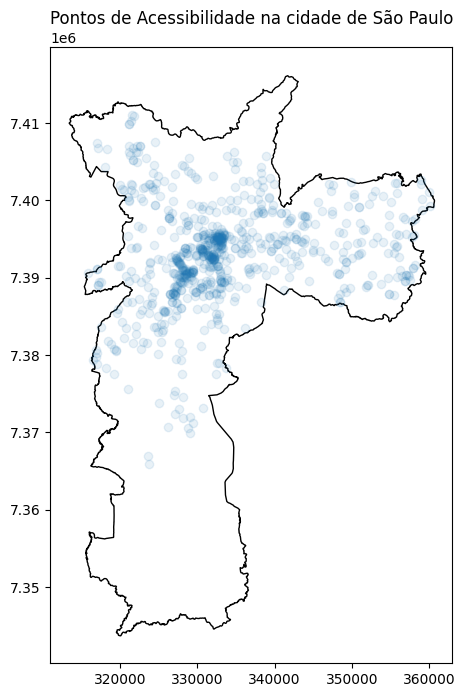

In [126]:
fig, grafico = plt.subplots(figsize=(8,8))
SP.plot(ax = grafico, color='white', edgecolor='black')
#estacoes.plot(ax = grafico, color=estacoes['cor'], edgecolor='white')
#trem.plot(ax=grafico, column='etr_linha', edgecolor='white')
a.plot(ax = grafico, alpha=0.1) #, color=estacoes['cor'], edgecolor='white')
plt.title('Pontos de Acessibilidade na cidade de São Paulo')
#plt.legend(handles=[azul, vermelha, verde, amarela, lilas, prata], loc='lower right')
plt.show()

# Pode-se observar que grande quantidade das áreas de acessibilidade se concentram nas regiões mais centrais da cidade de São Paulo. Enquanto os extremos norte e sul possuem cada vez menos áreas com essa destinação.

In [320]:
densidade = gpd.read_file('SIRGAS_SHP_densidade_demografica_2010.shp')

In [321]:
densidade.head()

,id,setor_cens,populacao,area_hect,habit_hect,ano_densid,an_censo,geometry
0,32355,355030865000149,573.0,0.100683,5691.134318,2010,2010,"POLYGON ((317440.922 7389005.647, 317403.592 7..."
1,32356,355030865000148,156.0,0.226534,688.637730,2010,2010,"POLYGON ((317403.592 7389019.580, 317388.527 7..."
2,24960,355030864000087,350.0,5.201065,67.293912,2010,2010,"POLYGON ((345980.396 7398089.850, 345984.765 7..."
3,24961,355030864000088,306.0,2.962862,103.278515,2010,2010,"POLYGON ((346080.561 7398266.434, 346014.992 7..."
4,24964,355030864000058,997.0,8.876239,112.322347,2010,2010,"POLYGON ((346465.106 7398670.813, 346491.061 7..."


<Axes: >

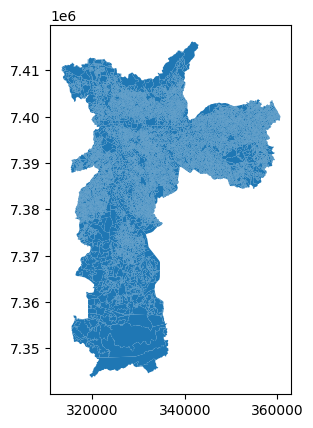

In [322]:
densidade.plot()

In [323]:
densidade.describe()

,populacao,area_hect,habit_hect,ano_densid,an_censo
count,18384.000000,18975.000000,18384.000000,18975.0,18975.0
mean,612.888436,8.066491,345.156240,2010.0,2010.0
std,314.520643,59.307325,722.612508,0.0,0.0
min,1.000000,0.026824,0.006443,2010.0,2010.0
25%,408.000000,1.751504,106.287859,2010.0,2010.0
50%,584.000000,3.455921,173.381772,2010.0,2010.0
75%,779.000000,5.795635,294.968068,2010.0,2010.0
max,3252.000000,4712.138000,30345.556016,2010.0,2010.0


In [336]:
densidade = densidade.loc[densidade['habit_hect'] > 150]

In [337]:
densidade.shape

(10743, 9)

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


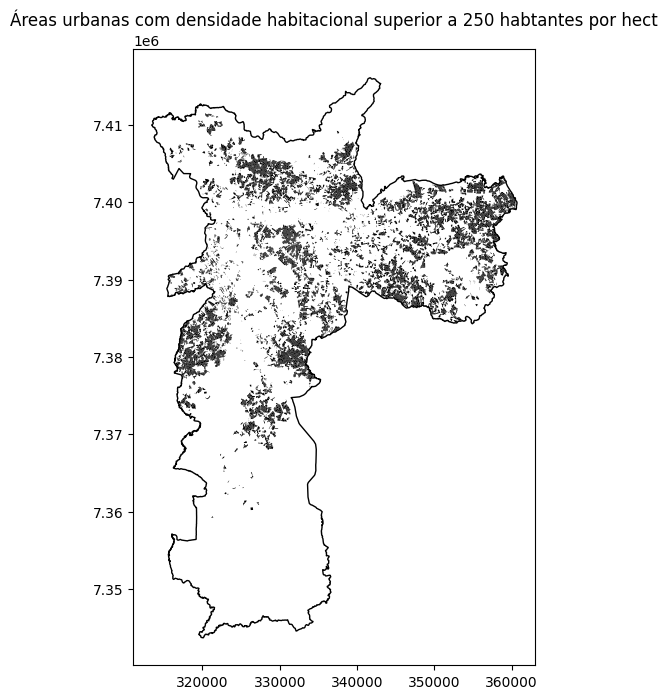

In [338]:
fig, grafico = plt.subplots(figsize=(8,8))
SP.plot(ax = grafico, color='white', edgecolor='black')
#estacoes.plot(ax = grafico, color=estacoes['cor'], edgecolor='white')
#trem.plot(ax=grafico, column='etr_linha', edgecolor='white')
densidade.plot(ax = grafico, column='geometry', color='black')
plt.title('Áreas urbanas com densidade habitacional superior a 250 habtantes por hect')
#plt.legend(handles=[azul, vermelha, verde, amarela, lilas, prata], loc='lower right')
plt.show()



# Através do gráfico de densidade podemos observar que as áreas de maior densidade demogáfica estão localizadas nas áreas centrais da cidade

In [339]:
import pandas as pd
import geopandas as gpd

import numpy as np #para processamento numérico em Python
import matplotlib.pyplot as plt #para os gráficos
import geopandas as gpd #para a leitura de shapefiles
import seaborn as sns #para fazer o mapa de kernel
from matplotlib.patches import Ellipse #para projetar a elipse


# pointpats --> análise espacial de pontos
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse
from pointpats import PointPattern
import pointpats.quadrat_statistics as qs
import pointpats.distance_statistics
from pointpats import PoissonPointProcess
from esda.moran import Moran
from splot.esda import moran_scatterplot
from pysal.explore import esda
from pysal.lib import weights
from splot.esda import plot_moran
from esda.moran import Moran_Local
from splot.esda import lisa_cluster
from splot.esda import plot_local_autocorrelation

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


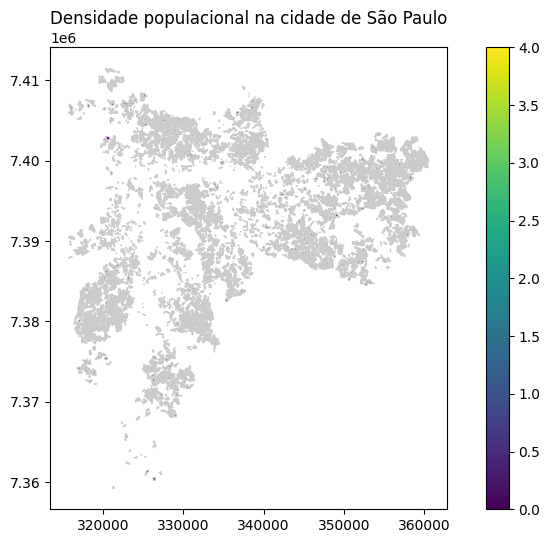

In [340]:
# com filtro para habit_hect > 150
variavel = 'habit_hect'

# Criando os quantis (k = 5) da variável
densidade['quantis'] = pd.qcut(densidade[variavel], q=5, labels=False)

# Plotando o mapa temático
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
densidade.plot(column='quantis', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Densidade populacional na cidade de São Paulo')
plt.show()

In [341]:
w = weights.KNN.from_dataframe(densidade, k = 5)
w.transform = 'R'

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 18 disconnected components.
  warnings.warn(message)


## Esse valor é resultado de um cálculo estatístico chamado Índice de Moran. O Índice de Moran é utilizado na análise de dados espaciais para avaliar se há autocorrelação espacial em um conjunto de dados.

In [342]:
moran = Moran(densidade['habit_hect'], w)
moran.I

0.2656842356409496

- O valor de 0.26 indica uma fraca autocorrlação espacial entre os valores de densidade habitacional. Isso ocorre devido a termos muitas sub áreas denominadas, que podem ser áreas de habitação ou áreas comerciais e de lazer muito próximas umas das outras.

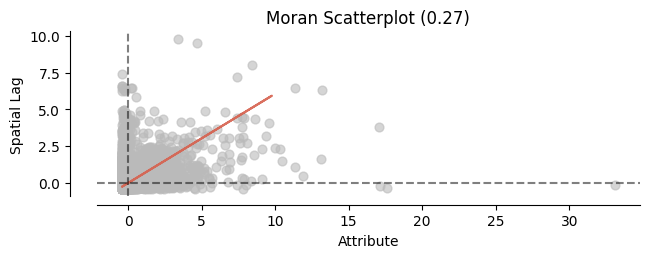

In [343]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

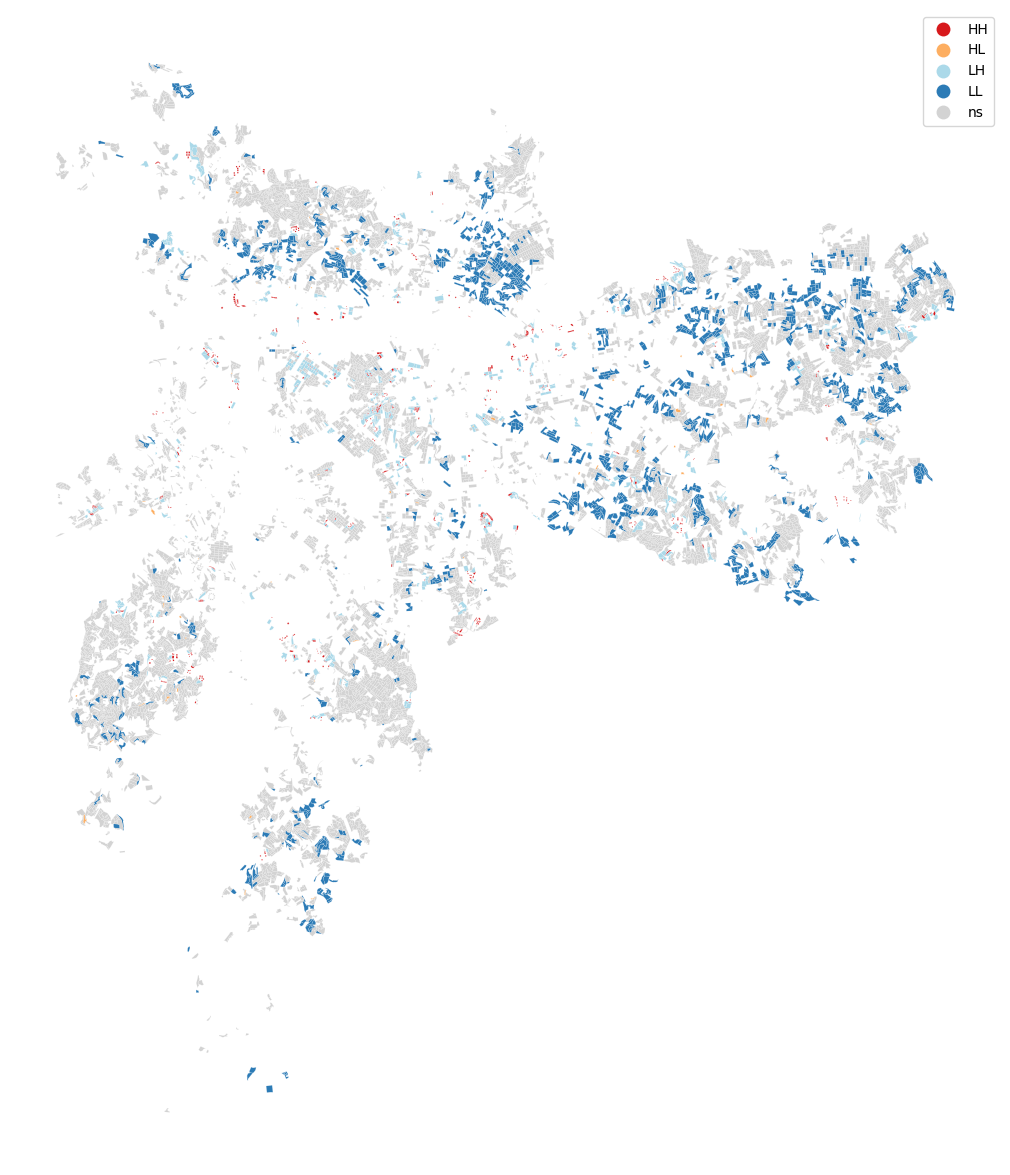

In [344]:
moran_l = Moran_Local(densidade['habit_hect'], w)
lisa_cluster(moran_l, densidade, p=0.05, figsize = (15,15))
plt.show()

# Não se pode concluir muito a respeito da densidade nestas regiões, pois é provável que os LOWLOW indiquem áreas comerciais e de lazer no centro da cidade e por isso são pouco povadas. Porém, áreas de comércio e lazer possuem alto fluxo de pessoas, o que demonstra também a importância de locias com acessibildade reservada.

# Com os dados iniciais

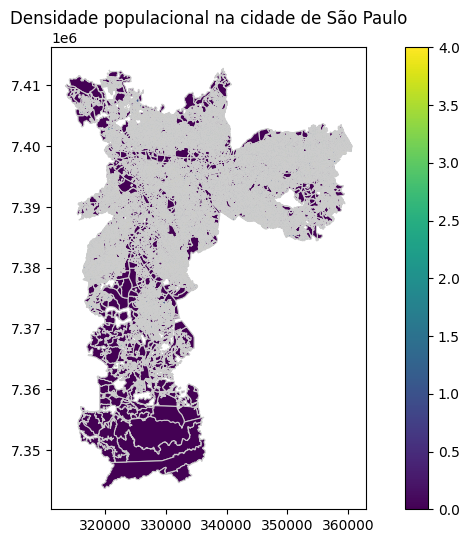

In [334]:
densidade = gpd.read_file('SIRGAS_SHP_densidade_demografica_2010.shp')
variavel = 'habit_hect'

# Criando os quantis (k = 5) da variável
densidade['quantis'] = pd.qcut(densidade[variavel], q=5, labels=False)

# Plotando o mapa temático
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
densidade.plot(column='quantis', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Densidade populacional na cidade de São Paulo')
plt.show()

# Sem realizar o filtro de densidade, pode-se observar que as áreas menos densamente habitadas são próximas umas das outras e estão distantes do centro da cidade.

# Agora vamos analisar o quanto a cidade de São Paulo está integrada para que pessoas cadeirantes possam se deslocar com autonomia.
# Para isso iremos verificar a área abrangente das estações de metro e trem da cidade.

In [279]:
trem = gpd.read_file('SIRGAS_SHP_estacaotrem.shp')

In [280]:
trem.head()

,etr_nome,etr_linha,etr_situac,etr_empres,geometry
0,GUARULHOS CECAP,JADE,OPERANDO,CPTM,POINT (347421.343 7406155.700)
1,ITAPEVI,DIAMANTE,OPERANDO,VIAMOBILIDADE,POINT (302408.876 7394687.335)
2,JURUBATUBA,ESMERALDA,OPERANDO,VIAMOBILIDADE,POINT (326428.545 7380449.431)
3,OSASCO,DIAMANTE,OPERANDO,VIAMOBILIDADE,POINT (318700.007 7396934.935)
4,TATUAPÃ,CORAL,OPERANDO,CPTM,POINT (339078.437 7395790.798)


<Axes: >

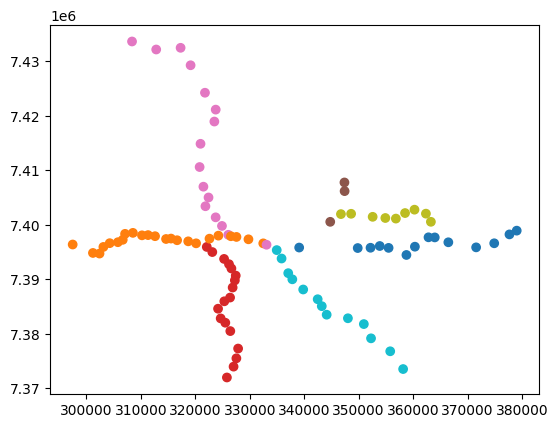

In [281]:
trem.plot(column='etr_linha')

In [284]:
estacoes = gpd.read_file('SIRGAS_SHP_estacaometro_point.shp')

In [285]:
estacoes.crs

<Axes: >

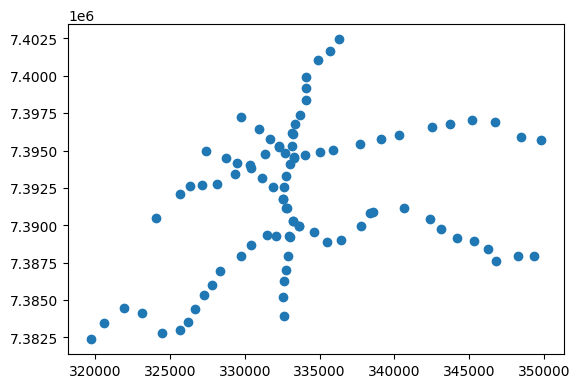

In [286]:
estacoes.plot()

In [287]:
estacoes.head()

,emt_empres,emt_situac,emt_linha,emt_nome,geometry
0,METRO,OPERANDO,VERMELHA,CORINTHIANS-ITAQUERA,POINT (349839.380 7395675.047)
1,METRO,OPERANDO,VERMELHA,ARTUR ALVIM,POINT (348457.592 7395884.165)
2,METRO,OPERANDO,VERMELHA,PATRIARCA,POINT (346732.712 7396874.617)
3,METRO,OPERANDO,VERMELHA,GUILHERMINA-ESPERANÇA,POINT (345181.965 7397070.921)
4,METRO,OPERANDO,VERMELHA,VILA MATILDE,POINT (343708.935 7396765.736)


In [288]:
def ajusta_cor(cor):
  if cor == 'AZUL':
    return 'blue'
  if cor == 'VERMELHA':
    return 'red'
  if cor == 'LILAS':
    return 'purple'
  if cor == 'VERDE':
    return 'green'
  if cor == 'AMARELA':
    return 'yellow'
  if cor == 'PRATA':
    return 'silver'


In [289]:
estacoes['cor'] = estacoes['emt_linha'].apply(lambda x : ajusta_cor(x))

In [290]:
estacoes.head()

,emt_empres,emt_situac,emt_linha,emt_nome,geometry,cor
0,METRO,OPERANDO,VERMELHA,CORINTHIANS-ITAQUERA,POINT (349839.380 7395675.047),red
1,METRO,OPERANDO,VERMELHA,ARTUR ALVIM,POINT (348457.592 7395884.165),red
2,METRO,OPERANDO,VERMELHA,PATRIARCA,POINT (346732.712 7396874.617),red
3,METRO,OPERANDO,VERMELHA,GUILHERMINA-ESPERANÇA,POINT (345181.965 7397070.921),red
4,METRO,OPERANDO,VERMELHA,VILA MATILDE,POINT (343708.935 7396765.736),red


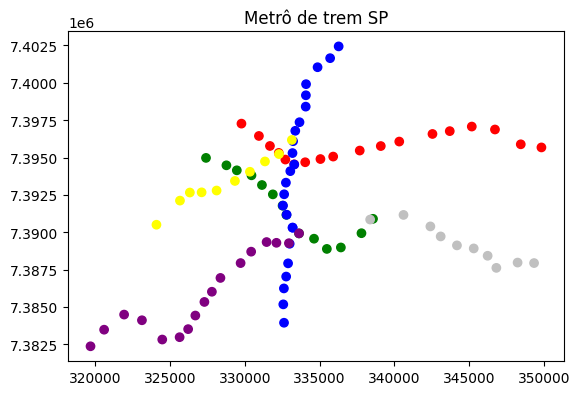

In [291]:
estacoes.plot(color=estacoes['cor']);
plt.title('Metrô de trem SP')
plt.show()

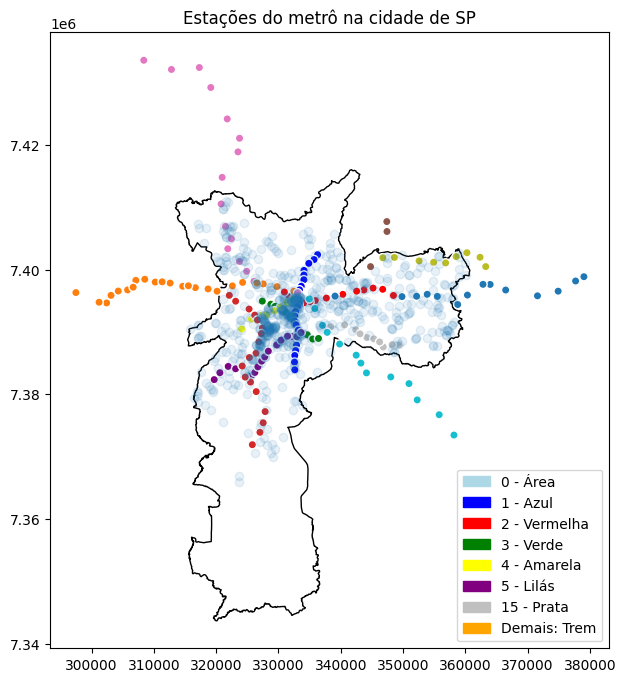

In [292]:
import matplotlib.patches as mpatches
azul = mpatches.Patch(color='blue', label='1 - Azul')
vermelha = mpatches.Patch(color='red', label='2 - Vermelha')
verde = mpatches.Patch(color='green', label='3 - Verde')
amarela = mpatches.Patch(color='yellow', label='4 - Amarela')
lilas = mpatches.Patch(color='purple', label='5 - Lilás')
prata = mpatches.Patch(color='silver', label='15 - Prata')
area = mpatches.Patch(color='lightblue', label='0 - Área')
t = mpatches.Patch(color='orange', label= 'Demais: Trem')

fig, grafico = plt.subplots(figsize=(8,8))
SP.plot(ax = grafico, color='white', edgecolor='black')
estacoes.plot(ax = grafico, color=estacoes['cor'], edgecolor='white')
trem.plot(ax=grafico, column='etr_linha', edgecolor='white')
a.plot(ax = grafico, alpha=0.1) #, color=estacoes['cor'], edgecolor='white')
plt.title('Estações do metrô na cidade de SP')
plt.legend(handles=[area, azul, vermelha, verde, amarela, lilas, prata, t], loc='lower right')
plt.show()

In [269]:
estacoes2 = estacoes.set_crs('EPSG:31983', allow_override=True)

In [84]:
SP2 = SP.set_crs('EPSG:31983', allow_override=True)
a2 = a.set_crs('EPSG:31983', allow_override=True)

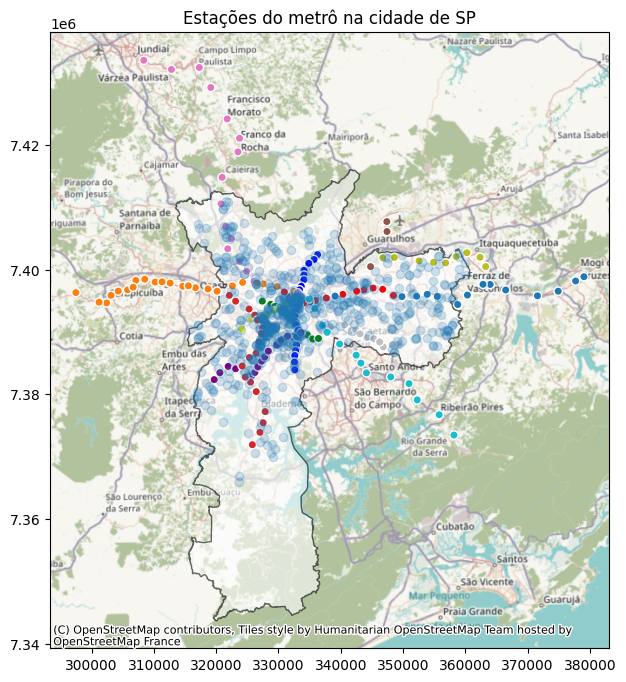

In [111]:
fig, grafico = plt.subplots(figsize=(8,8))
SP2.plot(ax = grafico, color='white', edgecolor='black', alpha=0.6)
estacoes2.plot(ax = grafico, color=estacoes2['cor'], edgecolor='white')
trem.plot(ax=grafico, column='etr_linha', edgecolor='white')
a.plot(ax = grafico, alpha=0.2)
plt.title('Estações do metrô na cidade de SP')
contextily.add_basemap(grafico, crs=estacoes2.crs.to_string())
plt.show()

# Mais uma vez podemos observar que a área de cobertura do metrô também se concentra na região mais central da cidade de São Paulo.

# Conclusões

- Pode-se concluir que o maior número de áreas de acessibilidade para cidadãos com mobilidade reduzida se encontram nas áreas centrais da cidade, o que é importante devido ao grande fluxo de pessoas diariamente. Por isso é importante vagas destinadas para estas pessoas. Além disso, é nas áreas centrais em que há maior linhas de metrô e trem na cidade de São Paulo, o que também faz sentidido uma vez que os serviços do terceiro setor estão majoritariamente concentrados nestas áreas.

- Vale resaltar que as linhas de trem e metrô possuem infraestrutura para receber e auxiliar no deslocamento de pessoas com necessidades especiais, como rampas e elevadores, além de profissionais treinados para ajudar conforme pode ser visto no link [metro.sp.gov.br](https://https://www.metro.sp.gov.br/wp-content/uploads/2023/07/manual_pessoa_com_deficiencia.pdf).



## Mesmo com uma área de vagas destidada para acessibilidade, deve-se questionar se estas vagas são o suficiente, assim como deve-se implementar políticas púbiblicas para melhorar o deslocamento de pessoas que moram em zonas mais afastadas (periféricas) que precisam de um transporte público de qualidade e com acessibilidade e digno.